In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargo la data a un df
df = pd.read_csv('train.csv', parse_dates=['Order Date', 'Ship Date'])
display(df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [3]:
# Convierto a formato de fechas
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
# Lleno los pocos nulos que hay en Postal Code
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

# Elimino Row ID porque no aporta valor
df = df.drop(columns='Row ID')

# Convierto los ingresos a miles
df['Sales'] = df['Sales'] / 1000

In [6]:
# Ingeniería de Características

# ORDER DATE Columnas de Año y Mes
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name().str[:3]

# SHIP DATE Columnas de Año y Mes
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month_name().str[:3]
display(df)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Ship Year,Ship Month
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,0.261960,2017,Nov,2017,Nov
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.731940,2017,Nov,2017,Nov
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,0.014620,2017,Jun,2017,Jun
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,0.957577,2016,Oct,2016,Oct
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,0.022368,2016,Oct,2016,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",0.003798,2017,May,2017,May
9796,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",0.010368,2016,Jan,2016,Jan
9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,0.235188,2016,Jan,2016,Jan
9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,0.026376,2016,Jan,2016,Jan


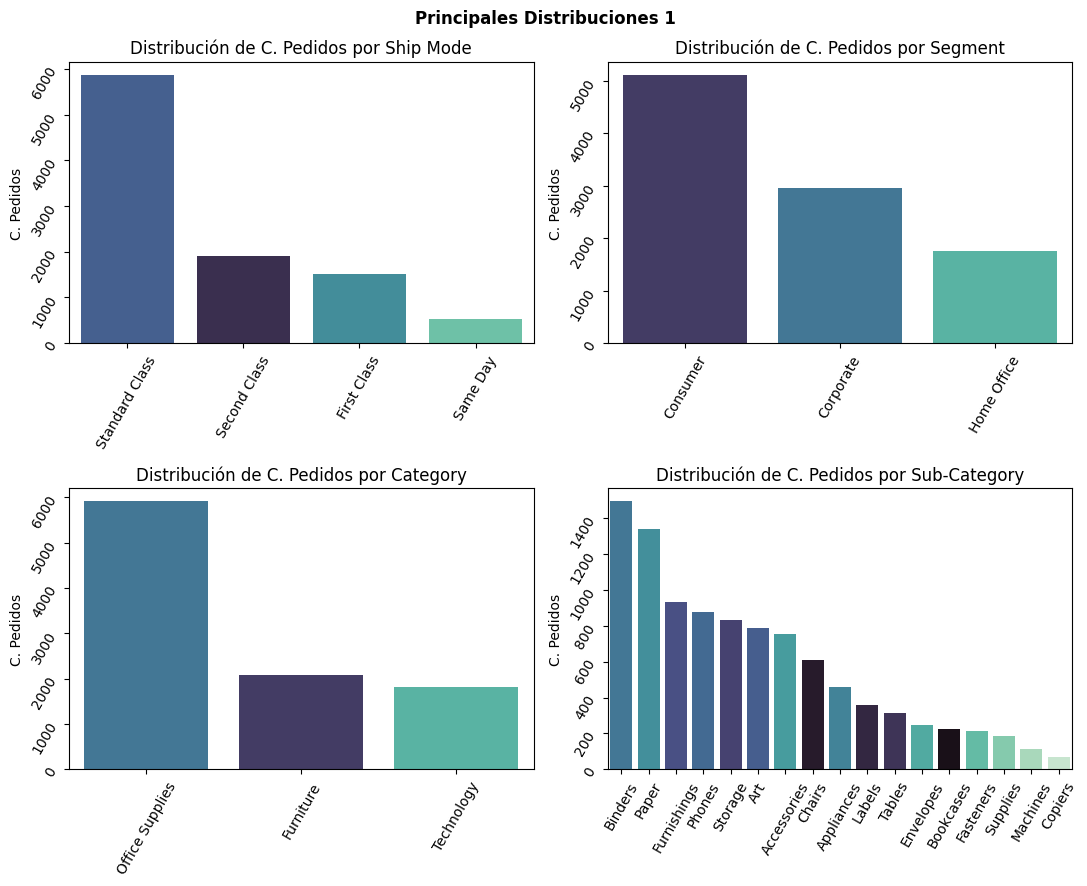

In [7]:
# PRINCIPALES DISTRIBUCIONES 1
fig, axe = plt.subplots(nrows=2, ncols=2, figsize=(11,9))
fig.suptitle('Principales Distribuciones 1', fontweight='bold')

# Para poder iterar entre los axes 
axe = axe.flatten()

dist_categoricas = ['Ship Mode', 'Segment', 'Category', 'Sub-Category']

for i, cat in enumerate(dist_categoricas):
    
    axe[i] = sns.countplot(data=df, x=cat, ax=axe[i], hue=cat, palette='mako', 
                           order=df[cat].value_counts().index)
    axe[i].set_title(f"Distribución de C. Pedidos por {cat}")
    axe[i].set_xlabel('')
    axe[i].set_ylabel('C. Pedidos')
    axe[i].tick_params(labelrotation=60)

plt.tight_layout()
plt.show()

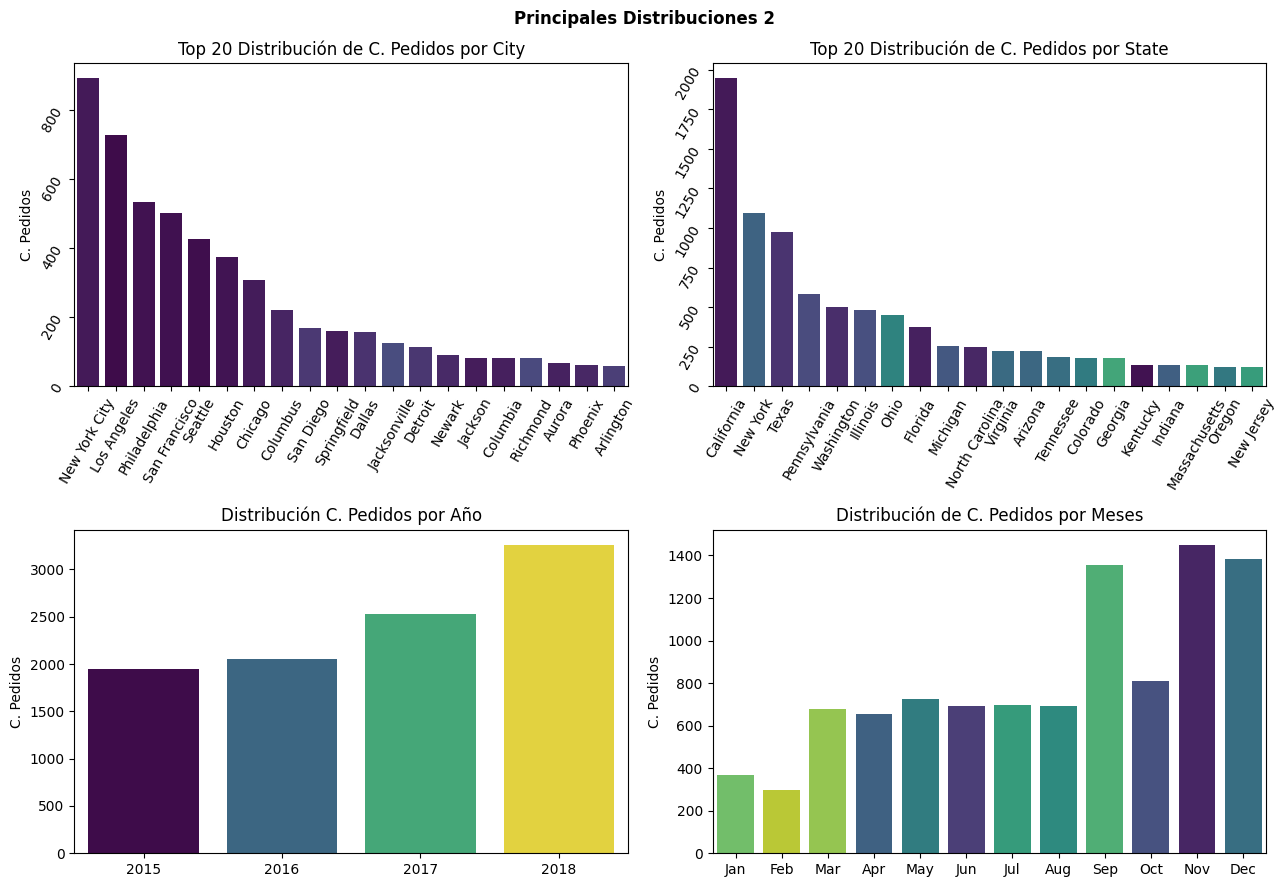

In [8]:
# PRINCIPALES DISTRIBUCIONES 2
fig2, axe2 = plt.subplots(nrows=2, ncols=2, figsize=(13,9))
fig2.suptitle('Principales Distribuciones 2', fontweight='bold')

# Para poder iterar entre el i de dist_categoricas2
axe2 = axe2.flatten()

dist_categoricas2 = ['City', 'State']

# TOP 20 Gráficos 1 y 2
for i, cat2 in enumerate(dist_categoricas2):
    axe2[i] = sns.countplot(data=df, x=cat2, ax=axe2[i], palette='viridis', hue=cat2, 
                            order=df[cat2].value_counts().iloc[:20].index)
    axe2[i].set_title(f"Top 20 Distribución de C. Pedidos por {cat2}")
    axe2[i].tick_params(labelrotation=60)
    axe2[i].set_xlabel('')
    axe2[i].set_ylabel('C. Pedidos')



orden_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
               'Oct', 'Nov', 'Dec']

# Gráfico 3 (Años)
sns.countplot(data=df, x='Order Year', ax=axe2[2], palette='viridis', 
              hue='Order Year', legend=False)
axe2[2].set_title(f"Distribución C. Pedidos por Año")
axe2[2].set_xlabel('')
axe2[2].set_ylabel('C. Pedidos')

# Gráfico 4 (Meses)
sns.countplot(data=df, x='Order Month', ax=axe2[3], palette='viridis',
              order=orden_meses, hue='Order Month', legend=False)
axe2[3].set_title('Distribución de C. Pedidos por Meses')
axe2[3].set_xlabel('')
axe2[3].set_ylabel('C. Pedidos')

plt.tight_layout()
plt.show()

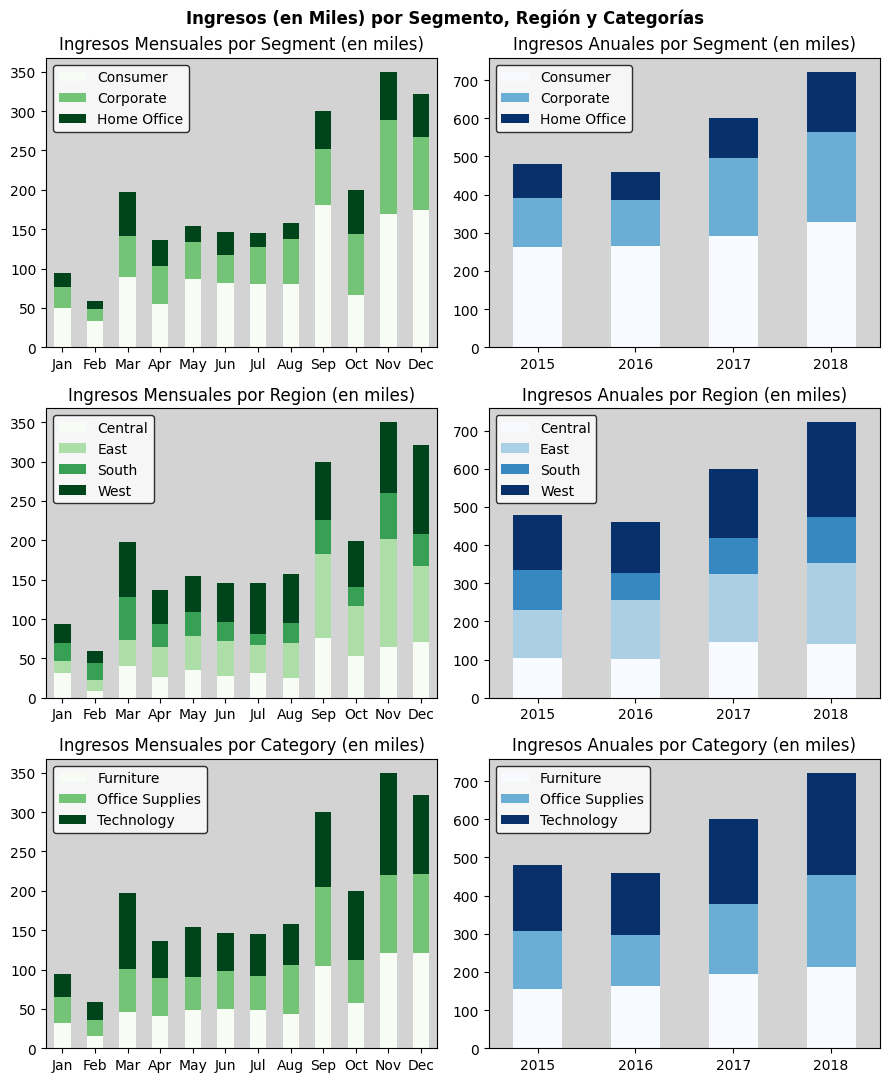

In [70]:
# INGRESOS X VARIABLES CATEGÓRICAS SIMPLES POR MESES Y AÑO

iter_sales = ['Segment', 'Region', 'Category']

fig3, axe3 = plt.subplots(nrows=3, ncols=2, figsize=(9,11)) 
fig3.suptitle('Ingresos (en Miles) por Segmento, Región y Categorías', 
              fontweight='bold')

# Para poder iterar y ordenar los gráficos correctamente
axe3 = axe3.flatten()
i_m = 0
i_y = 1

for cat in iter_sales:
    ing_cat_month = df.groupby(['Order Month', cat])['Sales'].sum() \
                                                        .unstack(fill_value=0)
    ing_cat_month = ing_cat_month.reindex(orden_meses)
    ing_cat_month.plot(kind='bar', stacked=True, ax=axe3[i_m], colormap='Greens')
    axe3[i_m].set_title(f'Ingresos Mensuales por {cat} (en miles)')
    axe3[i_m].set_xlabel('')
    axe3[i_m].set_ylabel('')
    axe3[i_m].tick_params(rotation=0)
    axe3[i_m].set_facecolor('lightgray')
    
    # Leyenda
    axe3[i_m].legend().get_frame().set_facecolor('lightgray')
    axe3[i_m].legend().get_frame().set_edgecolor('black')
    
    ing_cat_year = df.groupby(['Order Year', cat])['Sales'].sum() \
                                                        .unstack(fill_value=0)
    ing_cat_year.plot(kind='bar', stacked=True, ax=axe3[i_y], colormap='Blues')
    axe3[i_y].set_title(f'Ingresos Anuales por {cat} (en miles)')
    axe3[i_y].set_xlabel('')
    axe3[i_y].set_ylabel('')
    axe3[i_y].tick_params(rotation=0)
    axe3[i_y].set_facecolor('lightgray')
    
    # Leyenda
    axe3[i_y].legend().get_frame().set_facecolor('lightgray')
    axe3[i_y].legend().get_frame().set_edgecolor('black')
    
    i_m+=2
    i_y+=2
    
plt.tight_layout()
plt.show()
